<center> 
    <h1> DL Foundation Project : Predict Advertisement Success </h1>
</center><br>


### Table of Content

1. [Predict Advertisement Success](#section1)<br>
2. [The Advertisement Dataset](#section2)<br>
  - 2.1 [Get the Data](#section201)<br>
  - 2.2 [Clean the Data](#section202)<br>
  - 2.3 [Split the Data into Train and Test](#section203)<br>
  - 2.4 [Inspect the Data](#section204)<br>
  - 2.5 [Split Features from Labels](#section205)<br>
  - 2.6 [Normalize the Data](#section206)<br>
3. [The Model](#section3)<br>
  - 3.1 [Build the Model](#section301)<br>
  - 3.2 [Inspect the Model](#section302)<br>
  - 3.3 [Train the Model](#section303)<br>
  - 3.4 [Make Predictions](#section304)<br>
4. [Model Tuning](#section4)<br>
  - 4.1 [Increasing the Number of Hidden Layers and Hidden Units](#section401)<br>
  - 4.2 [Weight Regularization](#section402)<br>
  - 4.3 [Dropout](#section403)<br>
  - 4.4 [Combined L2 + Dropout](#section404)<br>
  - 4.5 [Batch Normalization](#section405)<br>
5. [KerasTuner](#section5)<br>
6. [PyCaret Approach](#section6)<br>
7. [Conclusion](#section7)<br>

<a id=section1></a> 
# 1. Predict Advertisement Success

This Dataset contains information about various advertisements.

Its a collection of approximately 26,000 different instances of advertisements of different products aired in different countries

The goal is to develop a predictive model that accurately classifies whether an ad will be profitable or not.

The **target feature** in the acquired data set is **netgain** and it's values are:

|Target Feature|Potential Values|
| :-- | :-- |
|**netgain**|True: ad will incur gain when sold|
||False: ad will not incur gain when sold|

<center><img src="https://blog.cambly.com/wp-content/uploads/2017/02/advertising-word-block.jpg"></center>

## Data Description

<center><img src="https://github.com/rajgupta5/DeepLearning-with-Python/blob/master/DLFoundationProject/AdvertisementSuccessDataset/data_description.png?raw=true"/></center>

<a id=section2></a> 
## 2. The Advertisement Dataset
<section1>
<br/>

In [1]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.3.0


In [5]:
!pip install -q git+https://github.com/tensorflow/docs

In [ ]:
# pip install --upgrade protobuf

In [6]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

### 2.0 Initialize Random Number Generator
Next, we need to __initialize the random number generator__ to a constant value (1). This will come handy later on for shuffling our dataset.

In [7]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

<a id=section201></a>
### 2.1 Get the Data

- First download the dataset.

In [8]:
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
# dataset = pd.read_csv('advertisement_success.csv')
dataset = pd.read_csv("/content/drive/My Drive/TensorFlow/advertisement_success.csv")

In [10]:
dataset.shape

(26048, 12)

In [11]:
dataset.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


<a id=section202></a>
### 2.2 Clean the Data

- The dataset contains a no missing values

In [12]:
dataset.isna().sum()

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 26048 non-null  int64  
 1   realtionship_status                26048 non-null  object 
 2   industry                           26048 non-null  object 
 3   genre                              26048 non-null  object 
 4   targeted_sex                       26048 non-null  object 
 5   average_runtime(minutes_per_week)  26048 non-null  int64  
 6   airtime                            26048 non-null  object 
 7   airlocation                        26048 non-null  object 
 8   ratings                            26048 non-null  float64
 9   expensive                          26048 non-null  object 
 10  money_back_guarantee               26048 non-null  object 
 11  netgain                            26048 non-null  boo

In [14]:
dataset = dataset.drop(['id'], axis=1)

<a id=section204></a>
### 2.4 Inspect the Data

- We will have a quick look at the target and feature columns from the training set.

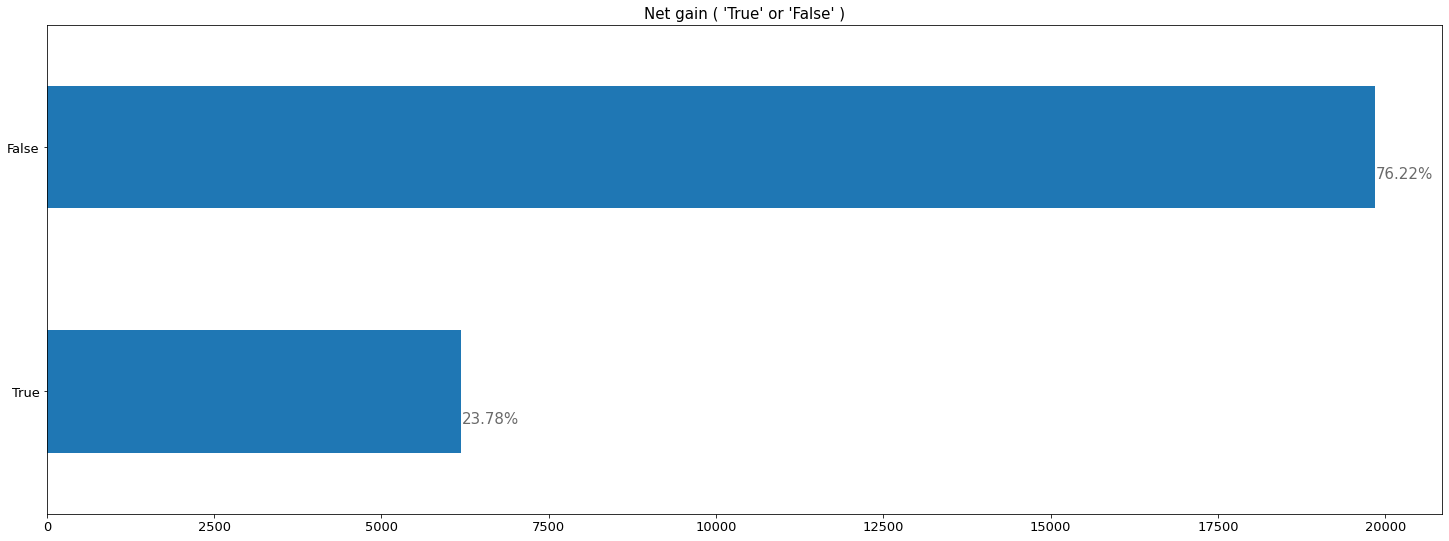

In [35]:
ax = dataset.netgain.value_counts().plot(kind='barh',figsize=(25,9),
                                         fontsize=13)


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.8, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

plt.title('Net gain ( \'True\' or \'False\' )', fontsize=15)
plt.show()

We see that total data we have 26,048 entries, of which 6195 have a net gain. This is 23% and so the dataset is imbalanced.



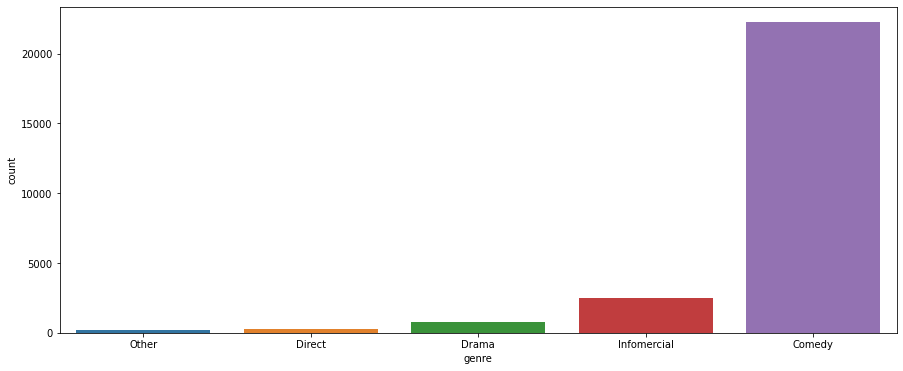

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(x='genre',data=dataset,order=dataset['genre'].value_counts().sort_values().index);



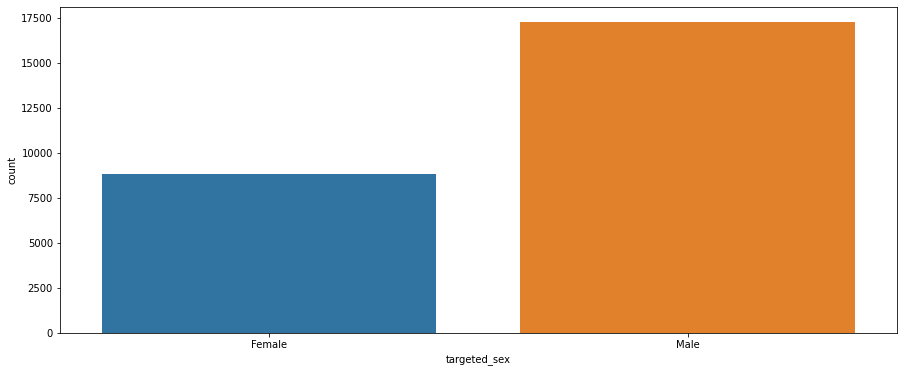

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(x='targeted_sex',data=dataset,order=dataset['targeted_sex'].value_counts().sort_values().index);

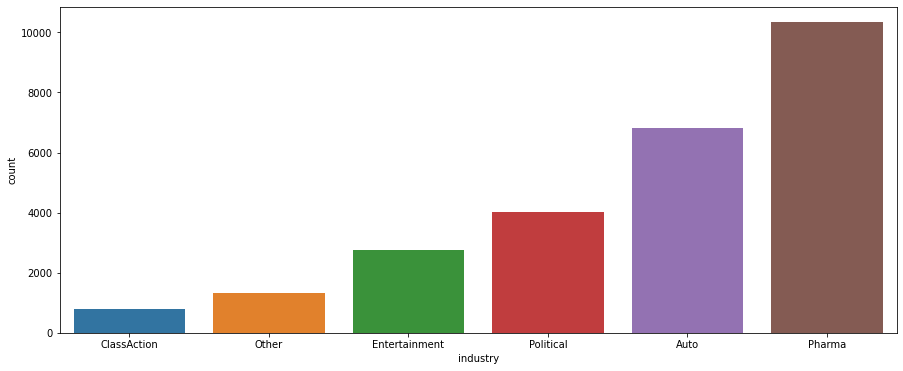

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(x='industry',data=dataset,order=dataset['industry'].value_counts().sort_values().index);

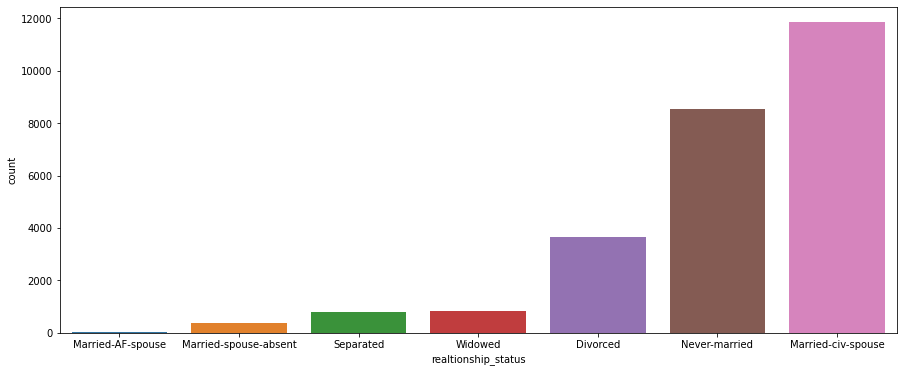

In [43]:
plt.figure(figsize=(15,6))
sns.countplot(x='realtionship_status',data=dataset,order=dataset['realtionship_status'].value_counts().sort_values().index);

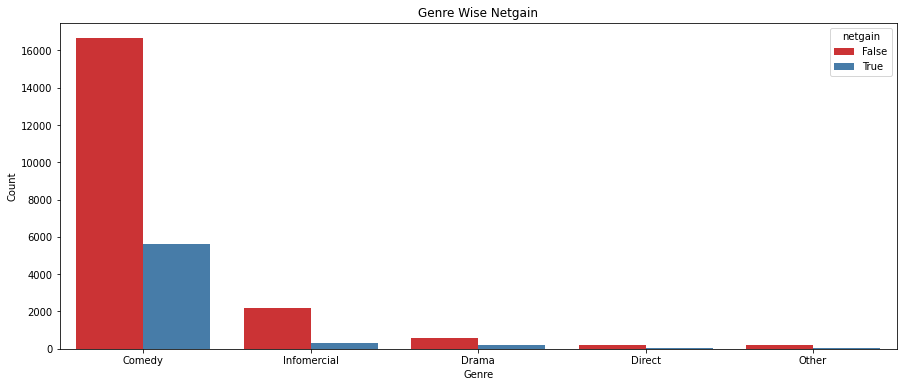

In [45]:
plt.figure(figsize=(15,6))
sns.countplot(x='genre',hue='netgain', data=dataset,palette="Set1")
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Wise Netgain')
plt.show()

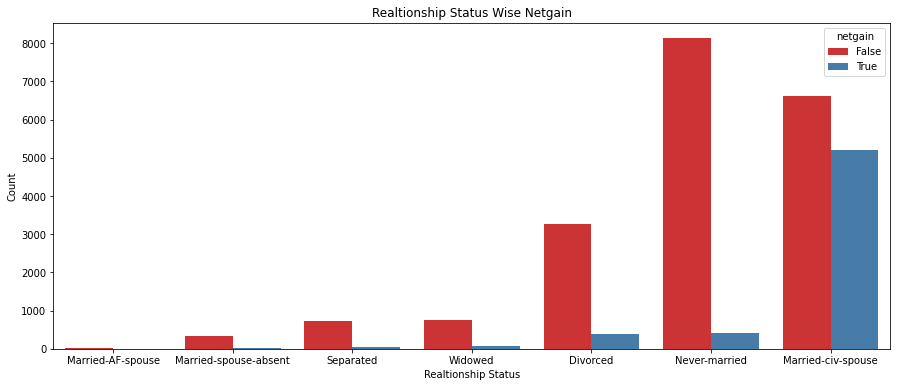

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(x='realtionship_status',hue='netgain', data=dataset,palette="Set1",order=dataset['realtionship_status'].value_counts().sort_values().index)
plt.xlabel('Realtionship Status')
plt.ylabel('Count')
plt.title('Realtionship Status Wise Netgain')
plt.show()

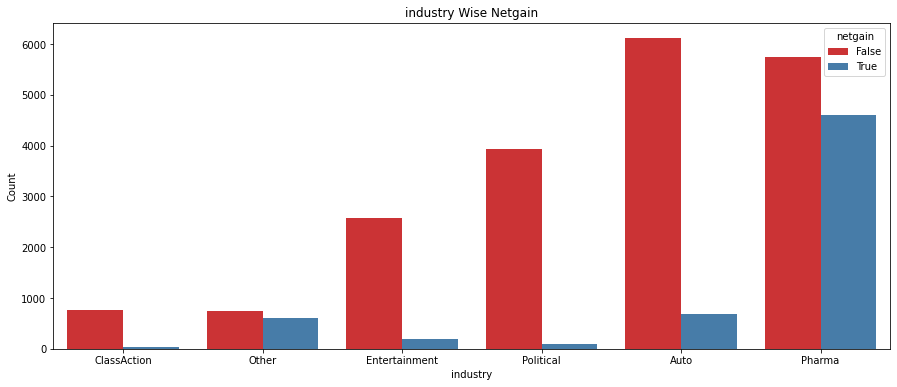

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(x='industry',hue='netgain', data=dataset,palette="Set1",order=dataset['industry'].value_counts().sort_values().index)
plt.xlabel('industry')
plt.ylabel('Count')
plt.title('industry Wise Netgain')
plt.show()

- Let's also look at the overall statistics:



In [21]:
train_stats = train_dataset.describe()
train_stats = train_stats.drop(['netgain'], axis=1)
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
realtionship_status,20838.0,2.605192,1.517395,0.0,2.000000,2.000000,4.000000,6.0
industry,20838.0,2.751800,1.879515,0.0,0.000000,4.000000,4.000000,5.0
genre,20838.0,0.397159,0.993744,0.0,0.000000,0.000000,0.000000,4.0
targeted_sex,20838.0,0.664027,0.472341,0.0,0.000000,1.000000,1.000000,1.0
average_runtime(minutes_per_week),20838.0,40.198723,12.475056,1.0,40.000000,40.000000,45.000000,99.0
airtime,20838.0,1.527642,0.628985,0.0,1.000000,2.000000,2.000000,2.0
airlocation,20838.0,36.970247,6.783765,0.0,39.000000,39.000000,39.000000,41.0
ratings,20838.0,0.038501,0.073548,0.0,0.027465,0.027465,0.027465,1.0
expensive,20838.0,0.840580,0.608304,0.0,0.000000,1.000000,1.000000,2.0
money_back_guarantee,20838.0,0.502447,0.500006,0.0,0.000000,1.000000,1.000000,1.0


In [ ]:
columns = ['realtionship_status', 'industry', 'genre', 'targeted_sex', 'airtime', 'airlocation', 'expensive', 'money_back_guarantee', 'netgain']
for col in columns:
    le = preprocessing.LabelEncoder()
    le.fit(dataset[col])
    list(le.classes_)
    dataset[col] = le.transform(dataset[col]) 
    dataset.head()

In [ ]:
dataset.head()


,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,3,0,0,1,45,2,39,0.027465,0,0,0
1,31593,2,4,0,1,45,2,39,0.027465,1,0,0
2,5681,0,2,0,0,45,2,39,0.027465,0,1,0
3,15491,5,5,3,0,40,2,39,0.027465,1,0,0
4,23587,2,4,0,1,48,2,39,0.027465,0,0,1


<a id=section203></a>
### 2.4 Split the Data into Train and Test

- Now we will split the dataset into a training set and a test set.

- We will use the test set in the final evaluation of our model.

In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)

In [ ]:
train_dataset.head()

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
8771,4,2,3,0,40,2,39,0.027465,0,1,0
13138,0,0,0,0,40,2,39,0.027465,1,0,0
15380,2,4,3,1,40,2,39,0.027465,0,0,0
15502,4,0,0,1,30,2,39,0.027465,0,1,0
16555,4,5,0,1,70,1,39,0.027465,1,0,0


In [ ]:
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
test_dataset.head()

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
10,4,5,3,1,20,2,39,0.027465,0,0,0
13,4,5,3,1,48,1,39,0.027465,1,0,0
19,2,4,0,1,45,2,39,0.027465,1,0,1
28,2,4,0,1,45,2,39,0.027465,1,1,0
40,0,2,0,0,40,2,39,0.027465,1,1,0


<a id=section205></a>
### 2.5 Split Features from Labels

- Separate the target value, or "label", from the features.

- This label is the value that we will train the model to predict.

In [22]:
train_labels = train_dataset.pop('netgain')

In [23]:
test_labels = test_dataset.pop('netgain')

<a id=section206></a>
### 2.6 Normalize the Data

- Look again at the `train_stats` block above and note how different the ranges of each feature are.

In [24]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [25]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

<a id=section3></a>
## 3. The Model

<a id=section301></a>
### 3.1 Build the Model

- Let's build our model.

- Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer that returns a single, continuous value.
  
  - Previously, we use the `model.add()` method to **add layers** to our sequential model.

  - Here, we will directly **pass** all our *model layers* as **list items**.

  - We achive same result in both ways.

- The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [ ]:
def build_model():
      model = keras.Sequential([layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
                                layers.Dense(64, activation='relu'),
                                layers.Dense(1, activation='sigmoid')])
      # Defining the optimizer with a specific learning rate of 0.001
      optimizer = tf.keras.optimizers.Adam()

      # Compiling the model
      model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
      return model

In [ ]:
model = build_model()

<a id=section302></a>
### 3.2 Inspect the Model

- Using the `.summary` method to print a simple description of the model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


- Now let's try out the model.

- Taking a batch of `10` examples from the training data and calling `model.predict` on it.

In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.5839382 ],
       [0.3821943 ],
       [0.4520072 ],
       [0.43876714],
       [0.49732053],
       [0.47833616],
       [0.4348208 ],
       [0.389011  ],
       [0.49187675],
       [0.48103335]], dtype=float32)

<a id=section303></a>
### 3.3 Train the Model

- Training the model for 1000 epochs, and recording the training and validation accuracy in the `history` object.

- We are using `tfdocs.modeling.EpochDots()` callback to print a "." every epoch, with reports after each 100 epochs.

  - These print settings are the default values, i. e. printing a "." after each epoch and a report after 100 epochs.

  - We can change these as per our requirements in the callback.

In [ ]:
history = model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2,
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.7979,  loss:0.4211,  val_accuracy:0.8013,  val_loss:0.4001,  
....................................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.330088,0.827654,0.406575,0.811900,95
96,0.328345,0.828014,0.403050,0.810941,96
97,0.329406,0.828134,0.407340,0.813580,97
98,0.328936,0.828314,0.407916,0.805902,98
99,0.328149,0.827175,0.414228,0.804942,99


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0.5, 1.0, 'Training and validation loss')

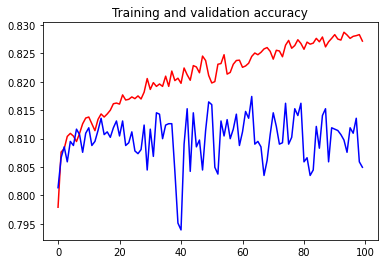

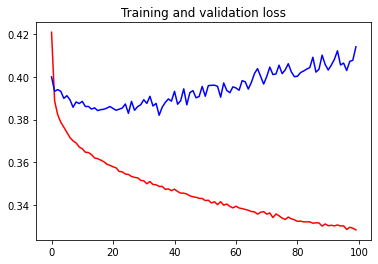

In [ ]:
# -----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
# -----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# ------------------------------------------------
# Plot training and validation accuracy per epoch
# ------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

# ------------------------------------------------
# Plot training and validation loss per epoch
# ------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

<a id=section304></a>
### 3.4 Make Predictions

- Finally, **predict netgaion** values using data in the testing set:

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

In [ ]:
result = model.predict(normed_test_data)

In [ ]:
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Accuracy: {:5.2f} netgain".format(accuracy))
print("Testing set Loss: {:5.2f} netgain".format(loss))

163/163 - 0s - loss: 0.4043 - accuracy: 0.8021


[0.4042535722255707, 0.8021113276481628]

<a id=section4></a>
## 4. Model Tuning

- We have already achieved very good result on our test set.

- If we train the model for too long, the model will start to overfit and learn patterns from the training data that don't generalize to the test data.

  - We need to strike a balance.
  
  - We have already learned how to train for an appropriate number of epochs using the **Early Stopping** callback.

- And, now we will experiment some additional methods to **improve** the model **performance** and reduce overfitting.

  - These methods will all be applied during model building.

<a id=section401></a>

1.   List item
2.   List item


### 4.1 Increasing the Number of Hidden Layers and Hidden Units

- We can improve model performance by increasing the number of hidden layers and hidden units in the model.

  - But this can result in overfitting.

- Here, we are increasing the number of **hidden layers** from 2 to **4** i. e. adding 2 additional layers.

- Next, we are using **256 hidden units** instead of 64.

In [ ]:
model = keras.Sequential([layers.Dense(256, activation='relu', input_shape=[len(train_dataset.keys())]),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(1, activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               2816      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 200,449
Trainable params: 200,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam()

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
history_large = model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.8026,  loss:0.4042,  val_accuracy:0.8059,  val_loss:0.3976,  
....................................................................................................

In [ ]:
hist_large = pd.DataFrame(history_large.history)
hist_large['epoch'] = history_large.epoch
hist_large.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.299088,0.841212,0.689874,0.809261,95
96,0.295328,0.841272,0.672155,0.803503,96
97,0.293957,0.840972,0.721501,0.806862,97
98,0.299753,0.840792,0.750631,0.804223,98
99,0.300392,0.839292,0.690217,0.802303,99


Text(0.5, 1.0, 'Training and validation loss')

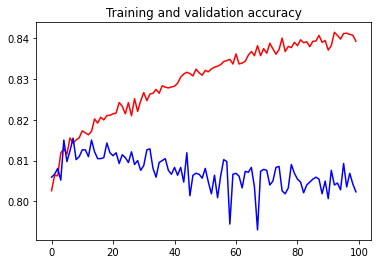

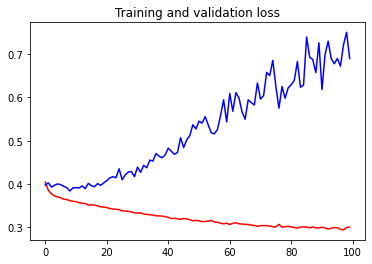

In [ ]:
# -----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
# -----------------------------------------------------------
acc = history_large.history['accuracy']
val_acc = history_large.history['val_accuracy']
loss = history_large.history['loss']
val_loss = history_large.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# ------------------------------------------------
# Plot training and validation accuracy per epoch
# ------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

# ------------------------------------------------
# Plot training and validation loss per epoch
# ------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

In [ ]:
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Accuracy: {:5.2f} netgain".format(accuracy))
print("Testing set Loss: {:5.2f} netgain".format(loss))

163/163 - 0s - loss: 0.6535 - accuracy: 0.8025
Testing set Accuracy:  0.80 netgain
Testing set Loss:  0.65 netgain


<a id=section402></a>
### 4.2 Weight Regularization

- Regularization places **constraints** on the quantity and type of information the model can store.

- If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.

- We can put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular".

- This is called "**weight regularization**", and it is done by adding to the loss function of the network a cost associated with having large weights.

- This cost comes in two flavors:

  - L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

  - L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights).
    - L2 regularization is also called weight decay in the context of neural networks.
    
    - Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

- L1 regularization pushes weights towards exactly zero encouraging a sparse model.

- L2 regularization will penalize the weights parameters without making them sparse since the penalty goes to zero for small weights.

  - One reason why L2 is more common.

- In `tf.keras`, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.

- Let's add L2 weight regularization to the model.

In [6]:
from tensorflow.keras import regularizers

In [ ]:
model = keras.Sequential([layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=[len(train_dataset.keys())]),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dense(1, activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               2816      
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 200,449
Trainable params: 200,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam()

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
history_l2 = model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.8001,  loss:0.6094,  val_accuracy:0.7999,  val_loss:0.4595,  
....................................................................................................

In [ ]:
hist_l2 = pd.DataFrame(history_l2.history)
hist_l2['epoch'] = history_l2.epoch
hist_l2.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.373051,0.814157,0.390454,0.816459,95
96,0.372436,0.818236,0.391861,0.812380,96
97,0.371965,0.814937,0.389955,0.811180,97
98,0.371796,0.814937,0.390307,0.815739,98
99,0.372405,0.816197,0.391252,0.812380,99


Text(0.5, 1.0, 'Training and validation loss')

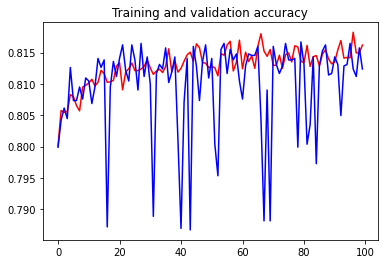

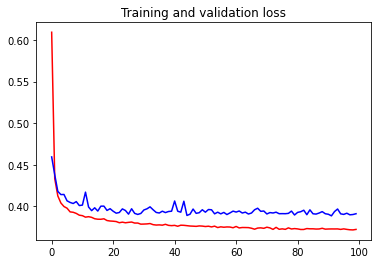

In [ ]:
# -----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
# -----------------------------------------------------------
acc = history_l2.history['accuracy']
val_acc = history_l2.history['val_accuracy']
loss = history_l2.history['loss']
val_loss = history_l2.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# ------------------------------------------------
# Plot training and validation accuracy per epoch
# ------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

# ------------------------------------------------
# Plot training and validation loss per epoch
# ------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

In [ ]:
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Accuracy: {:5.2f} netgain".format(accuracy))
print("Testing set Loss: {:5.2f} netgain".format(loss))

163/163 - 0s - loss: 0.3911 - accuracy: 0.8113
Testing set Accuracy:  0.81 netgain
Testing set Loss:  0.39 netgain


<a id=section403></a>
### 4.3 Dropout

- Dropout is one of the **most effective** and **most commonly used** regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto.

- The intuitive explanation for dropout is that because individual nodes in the network cannot rely on the output of the others, each node must output features that are useful on their own.

- Dropout, applied to a layer, consists of **randomly** "**dropping out**" (i.e. set to zero) a number of **output features** of the layer during training.

  - Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training.
  
  - After applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1].

- The "**dropout rate**" is the fraction of the features that are being zeroed-out; it is usually set between **0.2** and **0.5**.

- *At test time*, **no units are dropped out**, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

- In `tf.keras` we can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before.

- Let's add Dropout layers in our network to see how well they do at reducing overfitting.

In [ ]:
model = keras.Sequential([layers.Dense(256, activation='relu', input_shape=[len(train_dataset.keys())]),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(1, activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 256)               2816      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)              

In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam()

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
history_dropout = model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.7984,  loss:0.4178,  val_accuracy:0.8009,  val_loss:0.3991,  
....................................................................................................

In [ ]:
hist_dropout = pd.DataFrame(history_dropout.history)
hist_dropout['epoch'] = history_dropout.epoch
hist_dropout.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.336539,0.825315,0.429100,0.811660,95
96,0.334819,0.824895,0.439794,0.809981,96
97,0.334299,0.822795,0.435585,0.813340,97
98,0.334299,0.824415,0.436373,0.813580,98
99,0.333286,0.824475,0.431985,0.813340,99


Text(0.5, 1.0, 'Training and validation loss')

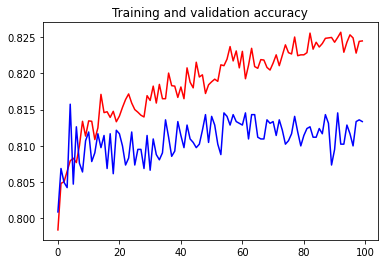

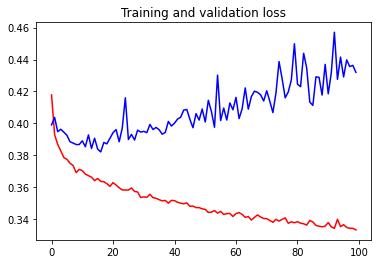

In [ ]:
# -----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
# -----------------------------------------------------------
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# ------------------------------------------------
# Plot training and validation accuracy per epoch
# ------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

# ------------------------------------------------
# Plot training and validation loss per epoch
# ------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

In [ ]:
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Accuracy: {:5.2f} netgain".format(accuracy))
print("Testing set Loss: {:5.2f} netgain".format(loss))

163/163 - 0s - loss: 0.4138 - accuracy: 0.8104
Testing set Accuracy:  0.81 netgain
Testing set Loss:  0.41 netgain


<a id=section404></a>
### 4.4 Combined L2 + Dropout

- We can also combine both L2 regularization and Dropout in a single model.

In [ ]:
model = keras.Sequential([layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=[len(train_dataset.keys())]),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dropout(0.2),
                          layers.Dense(1, activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 256)               2816      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)              

In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam()

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
history_l2_dropout = model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.7978,  loss:0.6749,  val_accuracy:0.7980,  val_loss:0.4883,  
....................................................................................................

In [ ]:
hist_l2_dropout = pd.DataFrame(history_l2_dropout.history)
hist_l2_dropout['epoch'] = history_l2_dropout.epoch
hist_l2_dropout.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.394828,0.805939,0.397474,0.810701,95
96,0.394481,0.808218,0.399012,0.808541,96
97,0.391020,0.807858,0.398542,0.809501,97
98,0.391507,0.809118,0.396723,0.808061,98
99,0.391334,0.808158,0.398497,0.815499,99


Text(0.5, 1.0, 'Training and validation loss')

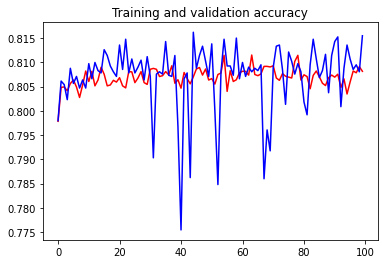

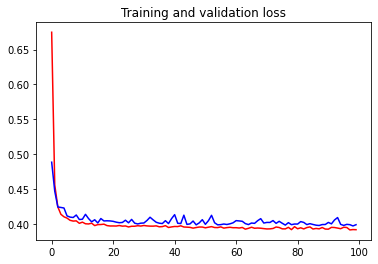

In [ ]:
# -----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
# -----------------------------------------------------------
acc = history_l2_dropout.history['accuracy']
val_acc = history_l2_dropout.history['val_accuracy']
loss = history_l2_dropout.history['loss']
val_loss = history_l2_dropout.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# ------------------------------------------------
# Plot training and validation accuracy per epoch
# ------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

# ------------------------------------------------
# Plot training and validation loss per epoch
# ------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

In [ ]:
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Accuracy: {:5.3f} netgain".format(accuracy))
print("Testing set Loss: {:5.3f} netgain".format(loss))

Testing set Accuracy: 0.807 netgain
Testing set Loss: 0.396 netgain


<a id=section405></a>
### 4.5 Batch Normalization

- Batch normalization is a technique for training very deep neural networks.

    - It **normalizes** the **activations** of the previous layer at each batch.

    - It applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

- This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

- Batch normalization may be used on the inputs to the layer before or after the activation function in the previous layer.

- It may be more appropriate **after** the activation function for **s-shaped** functions like the **hyperbolic tangent** and **logistic** function.

- It may be more appropriate **before** the activation function for activations that may result in **non-Gaussian** distributions like the **rectified linear** activation function, the modern default for most network types.

- Since we are using **ReLU** activation function in our model, we will use the Batch Normalization layer **prior** to the ReLU layer.

In [ ]:
model = keras.Sequential([layers.Dense(256, input_shape=[len(train_dataset.keys())]),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(256),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(256),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(256),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(1, activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               2816      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)              

In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam()

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
history_batch_norm = model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.7947,  loss:0.4195,  val_accuracy:0.7898,  val_loss:0.4046,  
....................................................................................................

In [ ]:
hist_batch_norm = pd.DataFrame(history_batch_norm.history)
hist_batch_norm['epoch'] = history_batch_norm.epoch
hist_batch_norm.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.330612,0.826095,0.420546,0.811180,95
96,0.330914,0.825735,0.419148,0.809501,96
97,0.331203,0.824115,0.421506,0.814779,97
98,0.330726,0.826335,0.428634,0.811660,98
99,0.330496,0.823635,0.429253,0.809981,99


Text(0.5, 1.0, 'Training and validation loss')

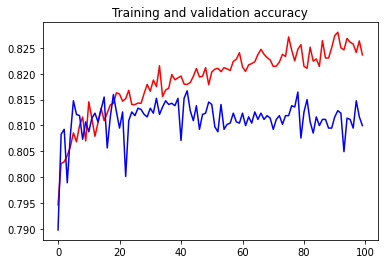

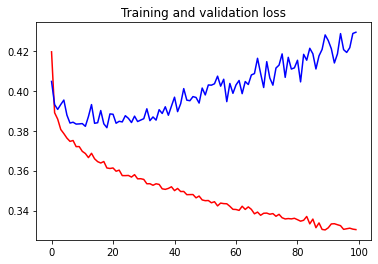

In [ ]:
# -----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
# -----------------------------------------------------------
acc = history_batch_norm.history['accuracy']
val_acc = history_batch_norm.history['val_accuracy']
loss = history_batch_norm.history['loss']
val_loss = history_batch_norm.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# ------------------------------------------------
# Plot training and validation accuracy per epoch
# ------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

# ------------------------------------------------
# Plot training and validation loss per epoch
# ------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

In [ ]:
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Accuracy: {:5.3f} netgain".format(accuracy))
print("Testing set Loss: {:5.3f} netgain".format(loss))

Testing set Accuracy: 0.805 netgain
Testing set Loss: 0.420 netgain


<a id=section4></a>
## 5. KerasTuner

In [1]:
!pip install -q keras-tuner


     |████████████████████████████████| 61kB 5.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=5f5fd4e8ff8c555227314ba298b32efe2c6374493e41e6a1314d0ef0076feeda
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=b62093a0873dc84ed2906d7f88d97319c411e42faec8dfc9b1e0986f655fb5b0
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=[len(train_dataset.keys())]))
    model.add(layers.Dense(1, activation='sigmoid'))
    for i in range(hp.Int('num_layers', 2, 20)):
      model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                        min_value=32,
                                        max_value=512,
                                        step=32),
                           activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)))
      model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model


In [19]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')


In [20]:
tuner.search_space_summary()


In [ ]:
tuner.search(normed_train_data, train_labels,
             epochs=100,
             validation_split=0.2)


In [27]:
models = tuner.get_best_models(num_models=2)


In [28]:
tuner.results_summary()


<a id=section4></a>
## 6. PyCaret Approach

In [49]:
!pip install -q pycaret

     |████████████████████████████████| 256kB 8.9MB/s 
     |████████████████████████████████| 266kB 17.3MB/s 
     |████████████████████████████████| 266kB 21.7MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 66.1MB 49kB/s 
     |████████████████████████████████| 174kB 61.9MB/s 
     |████████████████████████████████| 13.9MB 244kB/s 
     |████████████████████████████████| 1.6MB 55.7MB/s 
     |████████████████████████████████| 6.8MB 43.2MB/s 
     |████████████████████████████████| 1.8MB 57.9MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 604kB 48.7MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 3.1MB 51.1MB/s 
     |████████████████████████████████| 2.1MB 48.6MB/s 
     |████████████████████████████████| 163kB 55.7MB/s 
     |████████████████████████████████| 153kB 63.3MB/s 


In [10]:
import pandas as pd
dataset = pd.read_csv("/content/drive/My Drive/TensorFlow/advertisement_success.csv")

In [5]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (24746, 12)
Unseen Data For Predictions: (1302, 12)


In [8]:
from pycaret.classification import *

In [9]:
exp_clf101 = setup(data = data, target = 'netgain', session_id=123,
                   fix_imbalance=True,
                   normalize = True,
                   transformation = True,
                   remove_multicollinearity = True,
                   multicollinearity_threshold = 0.95)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"False: 0, True: 1"
3,Original Data,"(24746, 12)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.7861,0.8606,0.7571,0.5358,0.6273,0.4834,0.4979,16.6490
1,Light Gradient Boosting Machine,0.7825,0.8606,0.7605,0.5299,0.6244,0.4782,0.4938,0.4213
2,Random Forest Classifier,0.7765,0.7905,0.5604,0.5287,0.5437,0.3960,0.3965,0.3141
3,Gradient Boosting Classifier,0.7714,0.8636,0.8156,0.5126,0.6292,0.4764,0.5035,4.0702
4,Extreme Gradient Boosting,0.7690,0.8636,0.8212,0.5092,0.6284,0.4740,0.5027,2.8644
5,Ada Boost Classifier,0.7680,0.8618,0.8166,0.5082,0.6261,0.4711,0.4993,1.2626
6,Extra Trees Classifier,0.7676,0.7839,0.5630,0.5104,0.5350,0.3808,0.3818,2.7780
7,Decision Tree Classifier,0.7547,0.7020,0.6016,0.4873,0.5381,0.3737,0.3778,0.1828
8,Logistic Regression,0.7495,0.8384,0.8217,0.4844,0.6094,0.4426,0.4762,0.4962
9,K Neighbors Classifier,0.7387,0.7978,0.7253,0.4679,0.5687,0.3935,0.4131,0.7074


In [1]:
print(best_model)


NameError: ignored

In [12]:
gbc = create_model('gbc')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8211,0.8699,0.4927,0.6678,0.5670,0.4575,0.4659
1,0.8223,0.8728,0.4320,0.7063,0.5361,0.4340,0.4541
2,0.8176,0.8688,0.4526,0.6715,0.5407,0.4322,0.4453
3,0.8112,0.8560,0.4209,0.6603,0.5141,0.4040,0.4198
4,0.8141,0.8626,0.4380,0.6642,0.5279,0.4181,0.4322
5,0.8262,0.8658,0.4563,0.7094,0.5554,0.4536,0.4707
6,0.8349,0.8941,0.4854,0.7299,0.5831,0.4853,0.5010
7,0.8129,0.8666,0.4417,0.6594,0.5291,0.4180,0.4311
8,0.8118,0.8531,0.4903,0.6352,0.5534,0.4367,0.4426
9,0.8152,0.8615,0.4587,0.6608,0.5415,0.4305,0.4418


In [15]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [13]:
tuned_gbc = tune_model(gbc)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8240,0.8705,0.4102,0.7316,0.5257,0.4279,0.4550
1,0.8223,0.8671,0.3714,0.7574,0.4984,0.4054,0.4434
2,0.8164,0.8685,0.4039,0.6946,0.5108,0.4073,0.4300
3,0.8129,0.8500,0.3577,0.7101,0.4757,0.3766,0.4095
4,0.8147,0.8564,0.3869,0.6974,0.4977,0.3952,0.4211
5,0.8164,0.8635,0.3762,0.7176,0.4936,0.3946,0.4253
6,0.8297,0.8915,0.3811,0.7970,0.5156,0.4275,0.4704
7,0.8072,0.8657,0.3762,0.6681,0.4814,0.3741,0.3974
8,0.8025,0.8509,0.3762,0.6458,0.4755,0.3641,0.3843
9,0.8089,0.8531,0.3689,0.6816,0.4787,0.3742,0.4006


In [14]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=60,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.45000000000000007,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


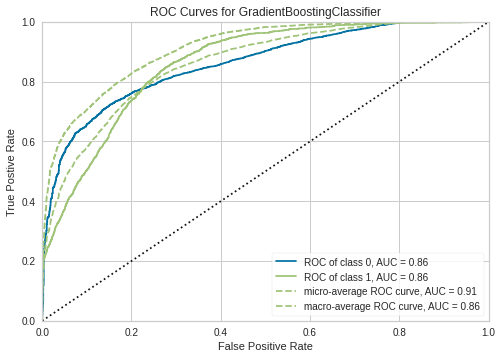

In [16]:
plot_model(tuned_gbc, plot = 'auc')


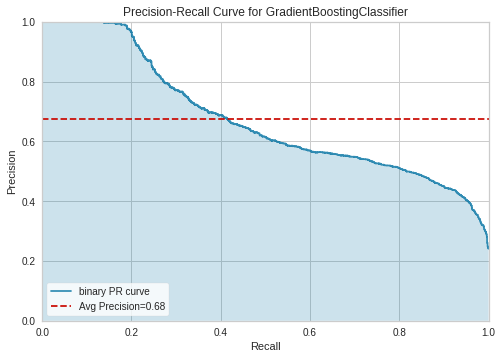

In [18]:
plot_model(tuned_gbc, plot = 'pr')


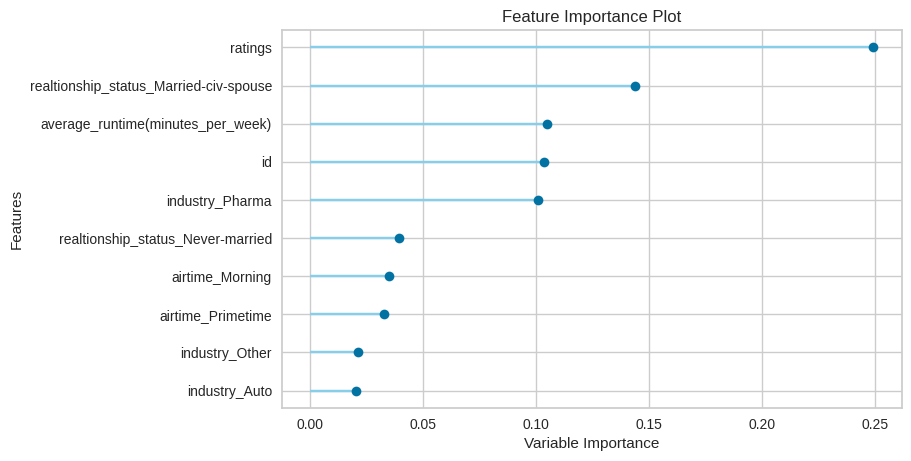

In [19]:
plot_model(tuned_gbc, plot='feature')


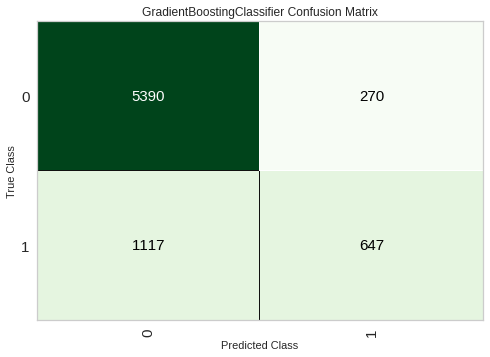

In [20]:
plot_model(tuned_gbc, plot = 'confusion_matrix')


In [22]:
final_gbc = finalize_model(tuned_gbc)


In [23]:
print(final_gbc)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=60,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.45000000000000007,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [24]:
predict_model(final_gbc);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8328,0.8948,0.3923,0.8037,0.5272,0.4399,0.4818


In [25]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()


,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain,Label,Score
0,28523,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,Yes,False,False,0.0777
1,22487,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Low,No,False,False,0.3047
2,9658,Separated,Auto,Comedy,Male,25,Primetime,United-States,0.027465,Low,No,False,False,0.0538
3,8672,Married-civ-spouse,Pharma,Comedy,Male,40,Primetime,United-States,0.027465,Medium,No,False,False,0.3732
4,17252,Never-married,Auto,Drama,Male,35,Morning,South,0.027465,High,No,False,False,0.0368


<a id=section5></a>
## 7. Conclusion

We experimented a few techniques to handle a classification problem.

- **Binary_CrossEntropy**  is a loss function used for binary classification problems.

- Similarly, evaluation metrics used for classification

  - A common classification metric is **Accuracy**.

- When numeric input data features have values with different ranges, each **feature** should be **scaled** independently to the same range.

- If there is not much training data, one technique is to prefer a **small network** with few hidden layers to avoid overfitting.

- **Early stopping** is a useful technique to prevent overfitting.

- We can improve the performance of a model by increasing the number of hidden layers and the hidden units in the model.

- Regularization Techniques to reduce overfitting are:

  - **Weight Regularization**

  - **Dropout**

  - **Batch Normalization**


**Experimentation Results**

- Dropout with L2 regularization comes out to be a best model with 81% accuracy
- PyCaret Approach gives us CatBoost Classifier as the best model with 78% accuracy
- KerasTuner is also used to find out best arhcitecture of neural network
- Since dataset is imbalanced, it does not produce good Precision ad Recall
- Model is not overfitted and generalized enough as difference of accuracy between Train and Test is very small
- PyCaret tells us Ratings and RelationshipStatus-Spouse_Married have high importance in making the decision of netgain